## Improt Lib

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Load Image

In [2]:
## !wget https://assets.gezdev.com/dip/AAA.bmp

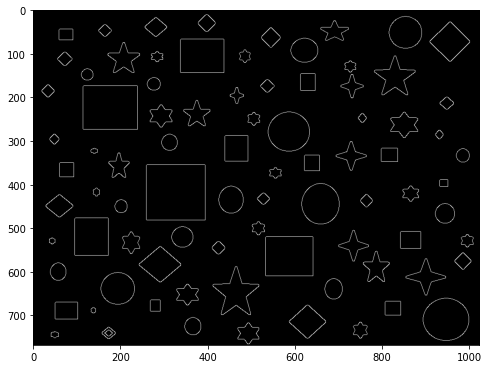

In [3]:
src = cv.imread("./AAA.jpg")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img, 50, 150)
plt.rcParams["figure.figsize"] = [8, 8]
plt.imshow(canny_image,cmap='gray')
plt.show()

896
2500
1254
1558
168
2120
1221
648
2499
1968
1517
1521
900
210
870
2091
1920
2400
960
2070
899
840
783
320
1406
340
728
1156
1332
2736
992
1248
208
1406
528
399
440
868
2756
957
1216
900
960
930
2915
1400
756
729
1088
700
806
858
2024
840
2990
2295
1600


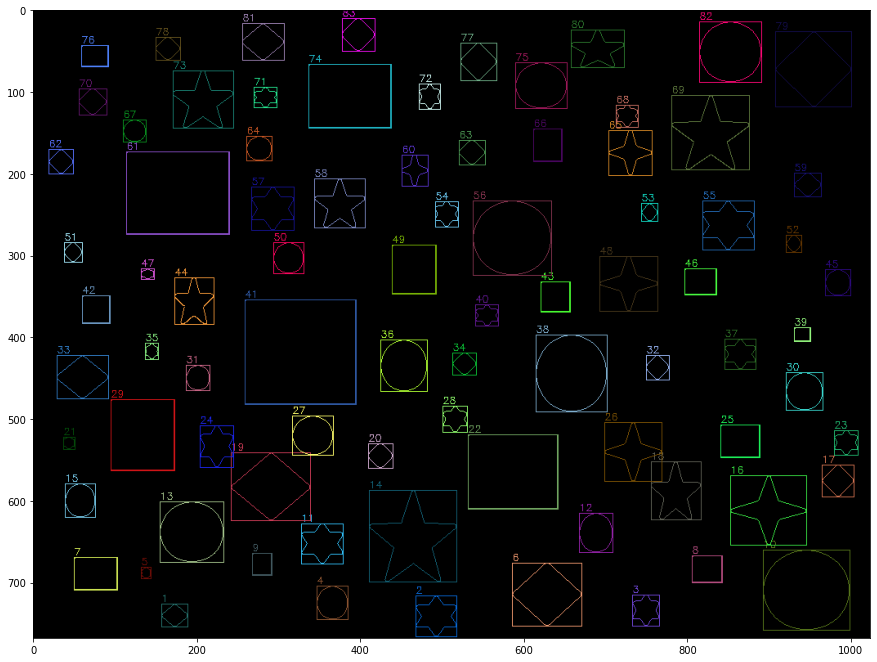

All Circle => 83


In [4]:
from numpy import random ## เรียกใช้งานโหมดสุ่ม
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
## Remove Coutours[i] ที่มีขนาดน้อยกว่า 3000 px ยกกำลัง 2
i = 0
while(1):
    _,_,w,h = cv. boundingRect(contours[i])
    if (w*h) <= 3000:
        contours.pop(i)
        i = i-1     ## Reset ค่าของ i 
    i-i+1           
    if(i>-len(contours)):
        break;
## re-check > 3000
for i,value in enumerate(contours):
    _,_,w,h, = cv.boundingRect(contours[i])
    if (w*h) <= 3000:
        print(w*h)

edge_img = canny_image.copy() ## สำเนาภาพ
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) ## สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB) ## ใช้สี

for i,value in enumerate(contours): ## ใช้ Loop เข้าใน Contours 
    c = random.randint(255, size=(3))   ## สุ่มค่าสี
    color = (c[0].item(),c[1].item(),c[2].item())   ## ใช้สี
    cv.drawContours(drawn_contour_img, contours, i, color, 1) ## วาด contours
    x,y,w,h = cv.boundingRect(contours[i]) ## กำหนดตัวแปร ไว้สร้างกรอบสี่เหลี่ยม ทุก contours
    cv.putText(drawn_contour_img,str(i+1),(x,y-3),cv.FONT_HERSHEY_SIMPLEX,0.4,color,1)  ## ตัวเลขบอกจำนวนของกรอบสี่เหลี่ยม
    cv.rectangle(drawn_contour_img,(x,y),(x+w,y+h),color,1) ## วาดกรอบสี่เหลี่ยม

plt.rcParams["figure.figsize"] = [15, 15] ## ขนาดของรูป
plt.imshow(drawn_contour_img)
plt.show()

print(f"All Circle => {i+1}") ## แสดงจำนวนกรอบทั้งหมด